## Soru 1

Bu ödev için, geçmiş sıcaklık veri kümesine yeniden bakacaksınız. Aşağıdaki görevler için çözümünüzü içeren Jupyter notebooks'u gist dosyasına link olarak ekleyin.

Öncelikle, Sıcaklık verilerini Kaggle'dan indirin.
Önceki derste olduğu gibi, hedef değişkeninizin görünür sıcaklık ve sıcaklık arasındaki fark olduğu bir doğrusal regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem ve rüzgar hızı kullanın. Şimdi, modelinizi OLS kullanarak tahmin edin. R-kare ve ayarlanmış R-kare değerleri nelerdir? Tatminkar olduklarını düşünüyor musunuz? Açıklayın.
Daha sonra, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. Şimdi, bu modelin R-kare değeri nedir? Bu model bir öncekine göre gelişti mi?
İlk modele ek açıklayıcı değişken olarak görünürlük ekleyin ve tahmin edin. R-kare arttı mı? Ayarlanmış R-kare değeri ne oldu? Tabloda ortaya çıkan farklılıkları, ayarlanmış R-kare içindeki iyileşme açısından etkileşim terimi ve görünürlük ile karşılaştırın. Hangisi daha kullanışlı?
AIC ve BIC puanlarına göre yukarıdaki üç modelden en iyisini seçin. Mentor ile gerekçenizi tartışarak seçiminizi doğrulayın.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts
import statsmodels.api as sm
import warnings


from statsmodels.tsa.stattools import acf
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import bartlett
from scipy.stats import levene
from sqlalchemy import create_engine
from sklearn import linear_model

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weatherHis.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
temp = df['Temperature (C)'] - df['Apparent Temperature (C)']

In [4]:
X = df[['Humidity','Wind Speed (km/h)']]
X
Y = temp

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:55:38   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R ve adj R squared 0.288 , çok iyi değiller, toplam varyansın sadece %28.8 ini açıklıyorlar


In [5]:
hum_wind = df['Humidity'] * df['Wind Speed (km/h)']
df['hum_wind'] = hum_wind

X2 = df[['Humidity', 'Wind Speed (km/h)', 'hum_wind']]
Y2 = temp

X2 = sm.add_constant(X2)

results2 = sm.OLS(Y2,X2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:58:30   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0839      0.033     -2.511      0.012      -0.149      -0.018
Humidity             -0.1775      0.043     -4.133      0.000      -0.262      -0.093
Wind Speed (km/h)    -0.0905      0.002    -36.797      0.000      -0.095      -0.086
hum_wind              0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Adj R squared 0.341'e yükseldi, modelimizi iyileştirdik ancak hala yetersiz diyebiliriz.

In [8]:
X3 = df[['Humidity','Wind Speed (km/h)', 'Visibility (km)']]
Y3 = temp

X3 = sm.add_constant(X3)

results3 = sm.OLS(Y,X3).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:03:00   Log-Likelihood:            -1.6938e+05
No. Observations:               96453   AIC:                         3.388e+05
Df Residuals:                   96449   BIC:                         3.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5756      0.028    -56.605      0.000      -1.630      -1.521
Humidity              2.6066      0.025    102.784      0.000       2.557       2.656
Wind Speed (km/h)     0.1199      0.001    179.014      0.000       0.119       0.121
Visibility (km)      -0.0540      0.001    -46.614      0.000      -0.056      -0.052
==============================================================================
Omnibus:                     3833.895   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.022
Skew:                           0.459   Prob(JB):                         0.00
Kurtosis:                       3.545   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Model 2 hala daha iyi, visibility yi Model 1'e eklemek işe yaramadı, etkleşim terimi daha iyi diyebiliriz
* AIC ve BIC için ; En düşük ve en iyi model Model iki, en yüksek ve en kötü model Model 1 olarak karşımıza çıkıyor.

## Soru 2

İlk olarak, Ev Fiyatları verilerini Kaggle'dan indirin.
Ev fiyatları modelinizi tekrar çalıştırın ve F-testi, R-kare, ayarlanmış R-kare, AIC ve BIC kullanarak modelinizin uygunluğunu değerlendirin.
Modelinizin tatmin edici olduğunu düşünüyor musunuz? Açıklayın
Modelinizin uygunluğunu iyileştirmek için, bazı değişkenleri ekleyerek veya kaldırarak farklı model özelliklerini deneyin.
Denediğiniz her model için, uygun metrikleri alın ve modellerinizi birbiriyle karşılaştırın. Hangi model en iyisidir ve neden?

In [9]:
df = pd.read_csv("trainh.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df = df.drop([ 'PoolQC','MiscFeature', 'Alley','Fence','FireplaceQu', 'PoolQC', 'MiscFeature'], axis = 1)

In [11]:
df.dropna(inplace=True)

In [12]:
Y=df["SalePrice"]
X=df[["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea", 'GarageCars', 'GarageArea']]

regr=linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
X=sm.add_constant(X)
sonuc=sm.OLS(Y, X).fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     556.1
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:06:52   Log-Likelihood:                -13178.
No. Observations:                1094   AIC:                         2.637e+04
Df Residuals:                    1087   BIC:                         2.640e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.226e+05   6044.073    -20.280      0.000   -1.34e+05   -1.11e+05
OverallQual  2.639e+04   1334.634     19.774      0.000    2.38e+04     2.9e+04
TotalBsmtSF    25.8991      7.475      3.465      0.001      11.233      40.565
1stFlrSF        6.1697      8.137      0.758      0.448      -9.797      22.136
GrLivArea      43.0658      3.308     13.020      0.000      36.576      49.556
GarageCars   1.823e+04   3697.570      4.929      0.000     1.1e+04    2.55e+04
GarageArea     17.1556     12.583      1.363      0.173      -7.534      41.845
==============================================================================
Omnibus:                      361.074   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29219.745
Skew:                          -0.556   Prob(JB):                         0.00
Kurtosis:                      28.294   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Adj R squared değerim 0.753 ki oldukça iyi bir değer, varyansın %75.3'ünü açıklıyor.
* F istatistiği 556.1 ve P değeri sıfıra oldukça yakındır, istatistiksel olarak modele bir şeyler kattığı ve salesprice'ı açıklamak için faydalı olduğunu söyleyebiliriz.


Şimdi p değeri yüksek olanları atalım

In [14]:
Y=df["SalePrice"]
X=df[["OverallQual", "TotalBsmtSF", "GrLivArea", 'GarageCars']]

regr=linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
X=sm.add_constant(X)
sonuc=sm.OLS(Y, X).fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     833.1
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:22:21   Log-Likelihood:                -13179.
No. Observations:                1094   AIC:                         2.637e+04
Df Residuals:                    1089   BIC:                         2.639e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.215e+05   5858.583    -20.736      0.000   -1.33e+05    -1.1e+05
OverallQual  2.628e+04   1331.186     19.739      0.000    2.37e+04    2.89e+04
TotalBsmtSF    32.1067      3.767      8.523      0.000      24.715      39.498
GrLivArea      44.1656      3.123     14.143      0.000      38.038      50.293
GarageCars   2.195e+04   2483.929      8.837      0.000    1.71e+04    2.68e+04
==============================================================================
Omnibus:                      358.560   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28329.981
Skew:                          -0.552   Prob(JB):                         0.00
Kurtosis:                      27.905   Cond. No.                     9.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Adj R squared değişmedi, Fstatistik büyüdü, AIC BIC değişmedi, bu iki değişkenin etkisinin çok da olmadığını görmüş olduk

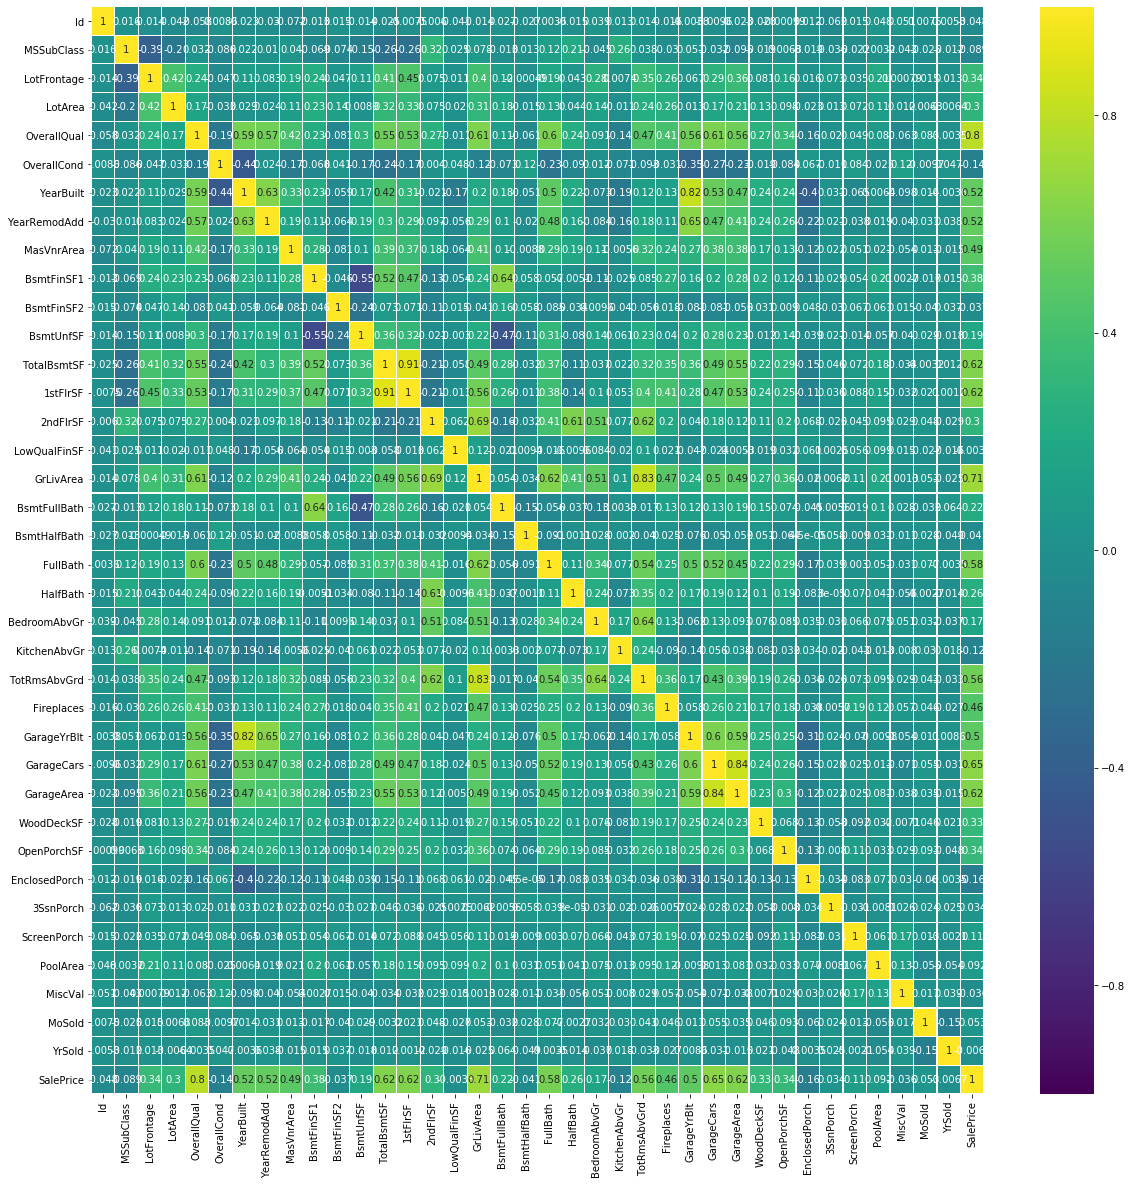

In [16]:
df_kor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

### YearBuilt'i ekleyelim:

In [17]:
Y=df["SalePrice"]
X=df[["OverallQual", "TotalBsmtSF", "GrLivArea", 'GarageCars', 'YearBuilt']]

regr=linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
X=sm.add_constant(X)
sonuc=sm.OLS(Y, X).fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:26:09   Log-Likelihood:                -13167.
No. Observations:                1094   AIC:                         2.635e+04
Df Residuals:                    1088   BIC:                         2.638e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.226e+05   1.04e+05     -5.998      0.000   -8.26e+05   -4.19e+05
OverallQual  2.303e+04   1479.309     15.565      0.000    2.01e+04    2.59e+04
TotalBsmtSF    29.0619      3.782      7.685      0.000      21.642      36.482
GrLivArea      49.7994      3.303     15.075      0.000      43.318      56.281
GarageCars   1.803e+04   2588.849      6.965      0.000     1.3e+04    2.31e+04
YearBuilt     265.3859     54.887      4.835      0.000     157.690     373.082
==============================================================================
Omnibus:                      370.084   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32892.220
Skew:                          -0.570   Prob(JB):                         0.00
Kurtosis:                      29.838   Cond. No.                     2.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* R squared değerlerinde küçük de olsa bir iyileşme olduğunu söyleyebiliriz. 

### FullBath'i ekleyelim:

In [19]:
Y=df["SalePrice"]
X=df[["OverallQual", "TotalBsmtSF", "GrLivArea", 'GarageCars', 'YearBuilt', 'FullBath']]

regr=linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
X=sm.add_constant(X)
sonuc=sm.OLS(Y, X).fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     573.3
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:28:56   Log-Likelihood:                -13165.
No. Observations:                1094   AIC:                         2.634e+04
Df Residuals:                    1087   BIC:                         2.638e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.045e+05   1.11e+05     -6.369      0.000   -9.22e+05   -4.87e+05
OverallQual   2.33e+04   1482.612     15.716      0.000    2.04e+04    2.62e+04
TotalBsmtSF    27.9408      3.812      7.329      0.000      20.460      35.421
GrLivArea      53.5420      3.742     14.310      0.000      46.200      60.884
GarageCars   1.854e+04   2595.648      7.141      0.000    1.34e+04    2.36e+04
YearBuilt     308.9532     58.532      5.278      0.000     194.104     423.802
FullBath    -7067.1602   3336.577     -2.118      0.034   -1.36e+04    -520.301
==============================================================================
Omnibus:                      394.353   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37115.434
Skew:                          -0.672   Prob(JB):                         0.00
Kurtosis:                      31.503   Cond. No.                     2.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Parametre sayısını artırmış olduk ve R squared çok da değişmedi, son model gerekli olmayabilir.

In [26]:
df['New'] = df['YearBuilt'] * df['YearRemodAdd']

Y=df["SalePrice"]
X=df[["OverallQual", "TotalBsmtSF", "GrLivArea", 'GarageCars', 'New', 'FullBath']]

regr=linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
X=sm.add_constant(X)
sonuc=sm.OLS(Y, X).fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     583.8
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:43:23   Log-Likelihood:                -13157.
No. Observations:                1094   AIC:                         2.633e+04
Df Residuals:                    1087   BIC:                         2.636e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.069e+05   7.39e+04     -8.216      0.000   -7.52e+05   -4.62e+05
OverallQual  2.193e+04   1512.521     14.499      0.000     1.9e+04    2.49e+04
TotalBsmtSF    28.7630      3.740      7.690      0.000      21.424      36.102
GrLivArea      54.7307      3.650     14.994      0.000      47.568      61.893
GarageCars   1.747e+04   2586.328      6.754      0.000    1.24e+04    2.25e+04
New             0.1334      0.020      6.592      0.000       0.094       0.173
FullBath    -8866.7537   3330.458     -2.662      0.008   -1.54e+04   -2331.900
==============================================================================
Omnibus:                      413.360   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43123.077
Skew:                          -0.731   Prob(JB):                         0.00
Kurtosis:                      33.723   Cond. No.                     2.36e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
df['New2'] = df['GrLivArea'] * df['GarageCars']
Y=df["SalePrice"]
X=df[["OverallQual", "TotalBsmtSF", 'New2']]

regr=linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
X=sm.add_constant(X)
sonuc=sm.OLS(Y, X).fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1229.
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:45:29   Log-Likelihood:                -13137.
No. Observations:                1094   AIC:                         2.628e+04
Df Residuals:                    1090   BIC:                         2.630e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.061e+04   6275.815     -9.658      0.000   -7.29e+04   -4.83e+04
OverallQual  2.506e+04   1264.350     19.823      0.000    2.26e+04    2.75e+04
TotalBsmtSF    28.9129      3.631      7.963      0.000      21.789      36.037
New2           19.3889      0.927     20.917      0.000      17.570      21.208
==============================================================================
Omnibus:                      399.661   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24329.928
Skew:                          -0.835   Prob(JB):                         0.00
Kurtosis:                      26.043   Cond. No.                     1.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Korelasyonu yüksek olan iki değişkenimizi çarparak parametre sayısını azaltıp denedik. %77'ye artırdık. Tüm değerler daha iyi görünüyor. Diğer yandan p değerleri de uygun. Son oluşturduğumuz model hepsinin içinde en iyisi diyebiliriz.